In [53]:
# Machine Learning Libraries and Dependencies
from numpy import array, linalg, mean
from matplotlib import pyplot as plt
from heapq import nsmallest

In [54]:
def knn_regression(X, Y, k=3):
    """
    K-Nearest Neighbors regression implementation using distance-based prediction
    """
    training_data = X
    target_values = Y
    
    def make_prediction(test_point):
        # Calculate Euclidean distances to all training points
        distances_with_indices = []
        for idx, training_point in enumerate(training_data):
            euclidean_dist = linalg.norm(array(test_point) - array(training_point))
            distances_with_indices.append((euclidean_dist, idx))
        
        # Get the k closest neighbors
        closest_neighbors = nsmallest(k, distances_with_indices)
        
        # Extract target values for the nearest neighbors
        neighbor_targets = [target_values[idx] for _, idx in closest_neighbors]
        
        # Return mean of neighbor target values
        return mean(neighbor_targets)
    
    return make_prediction


EVALUATING DATASET D
Training data: 100 samples (1D features)
Test data: 100 samples

Linear Regression Performance:
  → Test MSE: 0.2973

k-Nearest Neighbors Performance:
  → k= 1 neighbors: Test MSE = 0.5457
  → k= 2 neighbors: Test MSE = 0.4360
  → k= 3 neighbors: Test MSE = 0.3985
  → k= 4 neighbors: Test MSE = 0.3944
  → k= 5 neighbors: Test MSE = 0.3779
  → k= 6 neighbors: Test MSE = 0.3837
  → k= 7 neighbors: Test MSE = 0.3893
  → k= 8 neighbors: Test MSE = 0.3970
  → k= 9 neighbors: Test MSE = 0.4217


/var/folders/pp/36cjtzqx38df8ppy38n51m3h0000gn/T/ipykernel_66705/461036187.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(x_new * w + b)


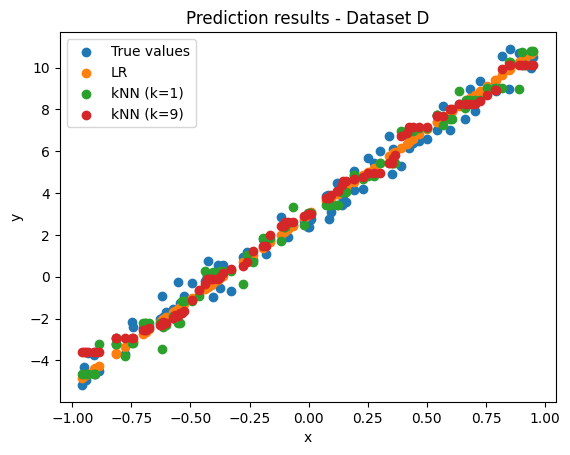

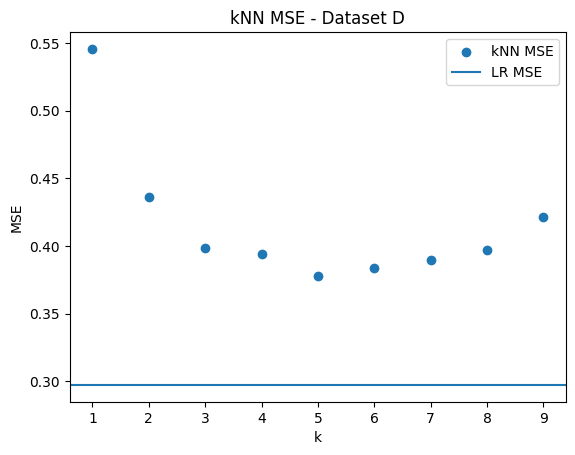


EVALUATING DATASET E
Training data: 100 samples (1D features)
Test data: 100 samples

Linear Regression Performance:
  → Test MSE: 0.0368

k-Nearest Neighbors Performance:
  → k= 1 neighbors: Test MSE = 0.0096
  → k= 2 neighbors: Test MSE = 0.0066
  → k= 3 neighbors: Test MSE = 0.0062
  → k= 4 neighbors: Test MSE = 0.0062
  → k= 5 neighbors: Test MSE = 0.0061
  → k= 6 neighbors: Test MSE = 0.0070
  → k= 7 neighbors: Test MSE = 0.0074
  → k= 8 neighbors: Test MSE = 0.0076
  → k= 9 neighbors: Test MSE = 0.0082


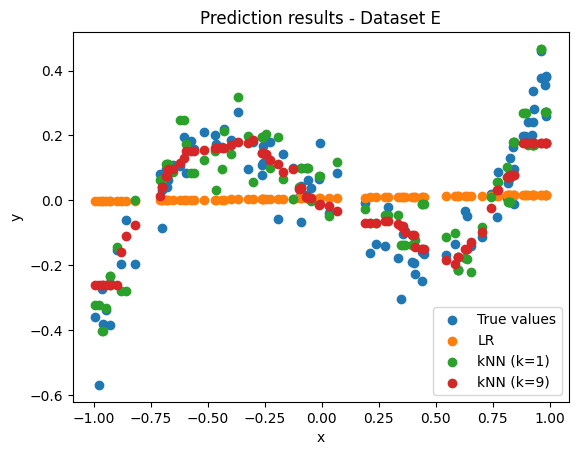

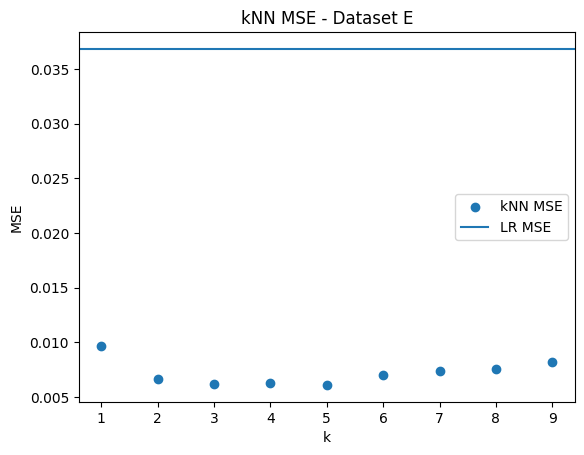

<Figure size 640x480 with 0 Axes>

In [55]:
# Utility functions
def load_csv(path):
    # Use numpy.loadtxt; CSVs are numeric, comma-separated.
    return np.loadtxt(path, delimiter=",", dtype=float)

def linear_regression(X, Y):
    # Handle both 1D and multi-dimensional X
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    if Y.ndim == 1:
        Y = Y.reshape(-1, 1)
    
    n = X.shape[0]
    A = np.hstack([X, np.ones((n, 1))])
    
    sol = np.linalg.solve(A.T @ A, A.T @ Y).ravel()
    w, b = sol[:-1], sol[-1]
    
    def predictor(x_new):
        if X.shape[1] == 1:  # 1D case
            return float(x_new * w + b)
        else:  # Multi-dimensional case
            return float(np.dot(x_new, w) + b)
    
    return predictor

def mse(y, y_pred):
    return np.sum((y - y_pred) ** 2) / y.shape[0]

def plot_predictions(x_test, y_test, y_lr_pred, knn_result, lr_mse, name):
    """Plot prediction results for 1D datasets"""
    plt.scatter(x_test, y_test, label="True values")
    plt.scatter(x_test, y_lr_pred, label="LR")
    
    for k in [0, 8]:
        plt.scatter(
            x_test,
            knn_result[k][0],
            label=f"kNN (k={k + 1})",
        )
    
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Prediction results - Dataset {name}")
    plt.savefig(f"q4_2_{name}.svg")
    plt.show()
    plt.clf()

def plot_mse_comparison(knn_result, lr_mse, name, save_prefix="q4_2"):
    """Plot MSE comparison between kNN and linear regression"""
    plt.scatter(range(1, 10), [mse for _, mse in knn_result], label="kNN MSE")
    plt.axhline(lr_mse, label="LR MSE")
    plt.legend()
    plt.xlabel("k")
    plt.ylabel("MSE")
    plt.title(f"kNN MSE - Dataset {name}")
    plt.savefig(f"{save_prefix}_{name}_mse.svg")
    plt.show()
    plt.clf()

def run_experiments(datasets, plot_1d=False, save_prefix="q4_2"):
    """Run kNN vs Linear Regression experiments on given datasets"""
    for name, x_train_path, y_train_path, x_test_path, y_test_path in datasets:
        # Load dataset
        x_train = load_csv(x_train_path)
        y_train = load_csv(y_train_path)
        x_test = load_csv(x_test_path)
        y_test = load_csv(y_test_path)

        print(f"\n{'='*50}")
        print(f"EVALUATING DATASET {name}")
        print(f"{'='*50}")
        
        if x_train.ndim > 1 and x_train.shape[1] > 1:
            print(f"Training data dimensions: {x_train.shape[0]} samples, {x_train.shape[1]} features")
            print(f"Target values shape: {y_train.shape}")
        else:
            print(f"Training data: {x_train.shape[0]} samples (1D features)")
            
        print(f"Test data: {x_test.shape[0]} samples")

        # Linear regression
        lr_predictor = linear_regression(x_train, y_train)
        y_lr_pred = np.array([lr_predictor(x) for x in x_test])
        lr_mse = mse(y_test, y_lr_pred)
        print(f"\nLinear Regression Performance:")
        print(f"  → Test MSE: {lr_mse:.4f}")

        # kNN regressions
        print(f"\nk-Nearest Neighbors Performance:")
        knn_result = []
        for k in range(1, 10):
            knn_predictor = knn_regression(x_train, y_train, k=k)
            y_knn_pred = np.array([knn_predictor(x) for x in x_test])
            knn_mse = mse(y_test, y_knn_pred)
            knn_result.append((y_knn_pred, knn_mse))
            print(f"  → k={k:2d} neighbors: Test MSE = {knn_mse:.4f}")

        # Plot results
        if plot_1d:
            plot_predictions(x_test, y_test, y_lr_pred, knn_result, lr_mse, name)
        
        plot_mse_comparison(knn_result, lr_mse, name, save_prefix)

# Run experiments for datasets D and E (1D datasets)
datasets_de = [
    (
        "D",
        "a1-files/X_train_D.csv",
        "a1-files/Y_train_D.csv",
        "a1-files/X_test_D.csv",
        "a1-files/Y_test_D.csv",
    ),
    (
        "E",
        "a1-files/X_train_E.csv",
        "a1-files/Y_train_E.csv",
        "a1-files/X_test_E.csv",
        "a1-files/Y_test_E.csv",
    ),
]

run_experiments(datasets_de, plot_1d=True, save_prefix="q4_2")


EVALUATING DATASET F
Training data dimensions: 100 samples, 20 features
Target values shape: (100,)
Test data: 100 samples

Linear Regression Performance:
  → Test MSE: 9.5972

k-Nearest Neighbors Performance:
  → k= 1 neighbors: Test MSE = 12.5728
  → k= 2 neighbors: Test MSE = 9.4374
  → k= 3 neighbors: Test MSE = 9.6338
  → k= 4 neighbors: Test MSE = 8.5383
  → k= 5 neighbors: Test MSE = 8.1903
  → k= 6 neighbors: Test MSE = 7.9938
  → k= 7 neighbors: Test MSE = 7.6131
  → k= 8 neighbors: Test MSE = 7.6172
  → k= 9 neighbors: Test MSE = 7.6837


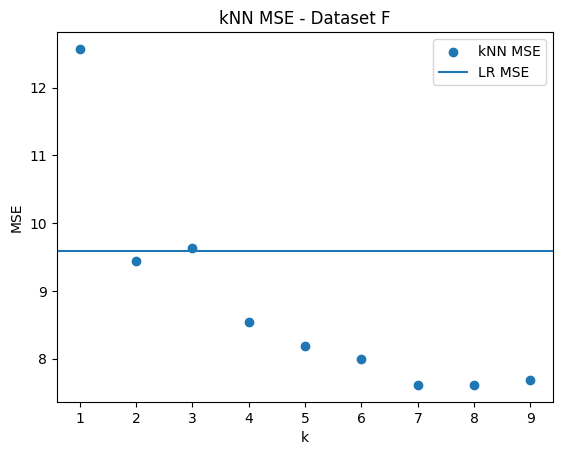

<Figure size 640x480 with 0 Axes>

In [56]:
# Run experiments for dataset F (multi-dimensional dataset)
datasets_f = [
    (
        "F",
        "a1-files/X_train_F.csv",
        "a1-files/Y_train_F.csv",
        "a1-files/X_test_F.csv",
        "a1-files/Y_test_F.csv",
    ),
]

run_experiments(datasets_f, plot_1d=False, save_prefix="q4_3")